## 1. Sample application of Noise2Clean

We have to do this in a separate notebook due to compatibility issues between TensorFlow versions used by Noise2Clean and FaceNet model

In [1]:
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('full_results', 'rb') as f:
    results = pickle.load(f)

In [3]:
results['gaussian_noise'] = results['guassian_noise']

In [4]:
cd ../../noise2noise

/home/ubuntu/examples/noise2noise


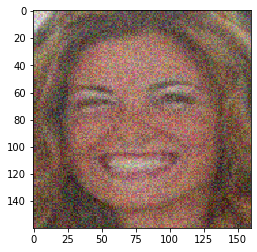

In [7]:
img = results['uniform_noise']['adversarials'][49]
plt.imshow(img)

In [5]:
import tester

/home/ubuntu/anaconda3/envs/n2n/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/n2n/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/n2n/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/anaconda3/envs/n2n/lib/python3.6/site-pack

In [24]:
out = tester.infer_image_out('../facenet/src/test/faces1-uniform/49.png', '../facenet/src/network_final-gaussian-n2c.pickle')

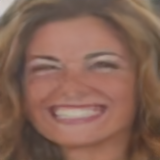

In [25]:
out

## 2. Defend against zero knowledge attack images

Attack images generate in previous Jupyter notebook

In [9]:
import os

In [28]:
out.save(os.path.join('../facenet/src/test/faces1-uniform-n2n/49.png'))

In [34]:
def generate_defended(attack_type, dir_name):    
    for i in range(50):
        adversarial = results[attack_type]['adversarials'][i]
        if (adversarial is not None):
            attack_image_path = '../facenet/src/test/faces1-' + dir_name + '/' + str(i) + '.png'
            out_image_path = '../facenet/src/test/faces1-' + dir_name + '-n2n/' + str(i) + '.png'
            out = tester.infer_image_out(attack_image_path, '../facenet/src/network_final-gaussian-n2c.pickle')
            out.save(os.path.join(out_image_path))

In [30]:
generate_defended('fgsm', 'fgsm')

In [35]:
generate_defended('deep_fool', 'deepfool')

In [36]:
generate_defended('uniform_noise', 'uniform')

In [37]:
generate_defended('gaussian_noise', 'gaussian')

## 3. Run Noise2Clean on unattacked images

Do this just to validate that this defense is reasonable and does not lower classification accuracy / confidence in correct prediction for unattacked images. Analysis happens in the main zero knowledge Jupyter notebook.

In [12]:
def generate_base_defended():
    for i in range(50):
        attack_image_path = '../facenet/src/test/faces1/' + str(i) + '.png'
        out_image_path = '../facenet/src/test/faces1-n2n/' + str(i) + '.png'
        out = tester.infer_image_out(attack_image_path, '../facenet/src/network_final-gaussian-n2c.pickle')
        out.save(os.path.join(out_image_path))

In [13]:
generate_base_defended()